# Modelagem do gradiente da gravidade 3D de um prisma poligonal 

**[Referências]**

* Plouff, D. , 1976, Gravity and magnetic fields of polygonal prisms and applications to magnetic terrain corrections, Geophysics, 41(4), 727-741. https://doi.org/10.1190/1.1440645.

## Importando as bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import polyprism_grad

## Gerando os parâmetros do sistema de coordenadas 

In [3]:
Nx = 500
Ny = 100
area = [-1250.,1250.,-1250.,1250.]
shape = (Nx,Ny)

In [4]:
x = np.linspace(area[0],area[1],num=Nx)
y = np.linspace(area[2],area[3],num=Ny) 
yc,xc = np.meshgrid(y,x)

In [5]:
voo = 0.
zc = voo*np.ones_like(xc)

In [6]:
coordenadas = np.array([yc.ravel(),xc.ravel(),zc.ravel()])

## Gerando os parâmetros do prisma

In [7]:
rho = np.array([200.])

In [8]:
x_verts = [300.,300.,-300.,-300.,300.]
y_verts = [-300.,300.,300.,-300.,-300.]

prism = np.array([y_verts,x_verts])

In [9]:
espessura = np.array([[50.,150.]])

In [10]:
poligono = [prism]

## Cálculo das componentes do campo de gravidade

In [11]:
gxx = polyprism_grad.gradient(coordenadas,poligono,espessura,rho,field="gxx")
gxy = polyprism_grad.gradient(coordenadas,poligono,espessura,rho,field="gxy")
gxz = polyprism_grad.gradient(coordenadas,poligono,espessura,rho,field="gxz")
gyy = polyprism_grad.gradient(coordenadas,poligono,espessura,rho,field="gyy")
gyz = polyprism_grad.gradient(coordenadas,poligono,espessura,rho,field="gyz")
gzz = polyprism_grad.gradient(coordenadas,poligono,espessura,rho,field="gzz")

In [12]:
tilt = np.arctan2(gzz,np.sqrt(gxz*gxz + gyz*gyz))

## Visualização dos dados calculados 

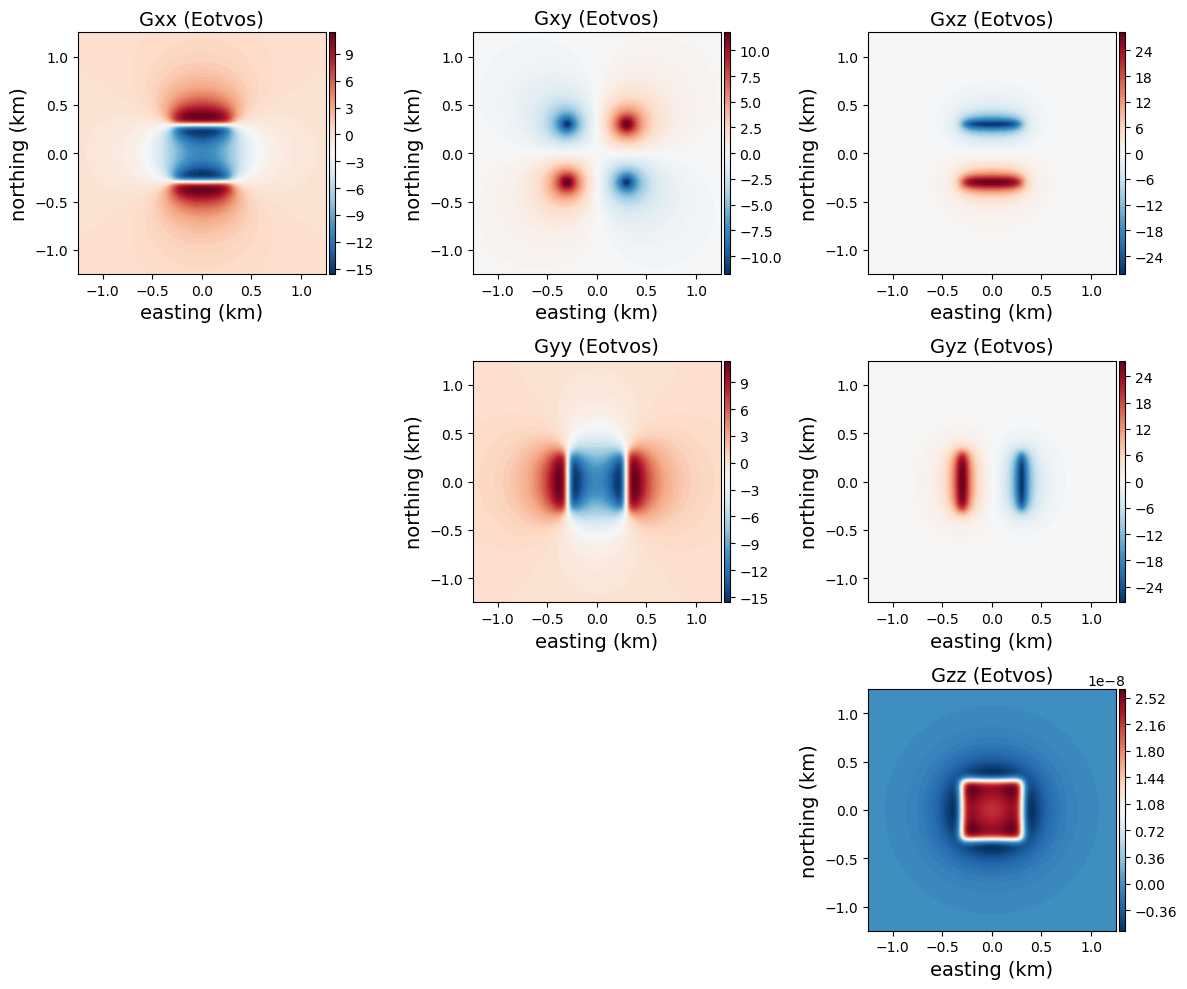

In [13]:
title_font = 14
bottom_font = 10
plt.close('all')
plt.figure(figsize=(12,10))

plt.subplot(331)
plt.xlabel('easting (km)', fontsize = title_font)
plt.ylabel('northing (km)', fontsize = title_font)
plt.title('Gxx (Eotvos)', fontsize=title_font)
plt.contourf(1e-3*yc,1e-3*xc,gxx.reshape(shape),100,cmap='RdBu_r')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.ax.tick_params(labelsize=bottom_font)

plt.subplot(332)
plt.xlabel('easting (km)', fontsize = title_font)
plt.ylabel('northing (km)', fontsize = title_font)
plt.title('Gxy (Eotvos)', fontsize=title_font)
plt.contourf(1e-3*yc,1e-3*xc,gxy.reshape(shape),100,cmap='RdBu_r')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.ax.tick_params(labelsize=bottom_font)

plt.subplot(333)
plt.xlabel('easting (km)', fontsize = title_font)
plt.ylabel('northing (km)', fontsize = title_font)
plt.title('Gxz (Eotvos)', fontsize=title_font)
plt.contourf(1e-3*yc,1e-3*xc,gxz.reshape(shape),100,cmap='RdBu_r')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.ax.tick_params(labelsize=bottom_font)

plt.subplot(335)
plt.xlabel('easting (km)', fontsize = title_font)
plt.ylabel('northing (km)', fontsize = title_font)
plt.title('Gyy (Eotvos)', fontsize=title_font)
plt.contourf(1e-3*yc,1e-3*xc,gyy.reshape(shape),100,cmap='RdBu_r')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.ax.tick_params(labelsize=bottom_font)

plt.subplot(336)
plt.xlabel('easting (km)', fontsize = title_font)
plt.ylabel('northing (km)', fontsize = title_font)
plt.title('Gyz (Eotvos)', fontsize=title_font)
plt.contourf(1e-3*yc,1e-3*xc,gyz.reshape(shape),100,cmap='RdBu_r')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.ax.tick_params(labelsize=bottom_font)

plt.subplot(339)
plt.xlabel('easting (km)', fontsize = title_font)
plt.ylabel('northing (km)', fontsize = title_font)
plt.title('Gzz (Eotvos)', fontsize=title_font)
plt.contourf(1e-3*yc,1e-3*xc,gzz.reshape(shape),100,cmap='RdBu_r')
plt.tick_params(axis='both', which='major', labelsize=bottom_font)
cb = plt.colorbar(pad=0.01, aspect=40, shrink=1.0)
cb.ax.tick_params(labelsize=bottom_font)

plt.tight_layout()
plt.show()